In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import project_env as pe
from datetime import timedelta, datetime
%matplotlib inline

In [2]:
data_simple = pd.read_csv('output/data_simple.csv', encoding = "ISO-8859-1", low_memory=False)
data_simple['UNIQUE_ID'] = pd.Series(np.arange(data_simple.shape[0]))

In [3]:
numeric = data_simple._get_numeric_data()

In [4]:
numeric.columns

Index(['UNIQUE_ID', 'ADD_DATE', 'ARREST_DATE', 'BAR_ADMISSION', 'CHARGE_CLASS',
       'DFDN_SEQ_NBR', 'DOB', 'POLICE_RPT_DATE', 'POLICE_RPT_DAYS', 'SADA_DOB',
       'SCREENING_DAYS', 'SCREENING_DISP_CODE', 'SCREENING_DISP_DATE',
       'SYS_NBR'],
      dtype='object')

In [5]:
date_features = ['POLICE_RPT_DATE','ARREST_DATE','ADD_DATE','SADA_DOB','DOB']
print('Before converting to date type:')
pe.getDfSummary(numeric[date_features]).transpose()

Before converting to date type:


,POLICE_RPT_DATE,ARREST_DATE,ADD_DATE,SADA_DOB,DOB
type,int64,float64,float64,float64,int64
mean,1.7128e+07,1.93562e+07,1.97966e+07,1.96058e+07,1.93428e+07
std,6.94695e+06,3.36085e+06,1.68998e+06,81828.7,2.58012e+06
min,0,0,0,1.90105e+07,0
25%,1.99008e+07,1.99103e+07,1.99106e+07,1.96e+07,1.96101e+07
50%,1.99405e+07,1.99405e+07,1.99409e+07,1.963e+07,1.9701e+07
75%,1.99706e+07,1.99705e+07,1.99707e+07,1.966e+07,1.97708e+07
max,1.99911e+07,1.99911e+07,1.99911e+07,1.974e+07,1.99909e+07
number_distinct,3770,5577,4605,64,19779
valid_count,280294,280290,280290,243862,280294


In [6]:
#convert dates to python dates
date_features = ['POLICE_RPT_DATE','ARREST_DATE','ADD_DATE','SADA_DOB','DOB','SCREENING_DISP_DATE','BAR_ADMISSION']

for feature in date_features:
    numeric[feature] = pe.to_date(numeric[feature])
    data_simple[feature] = pe.to_date(data_simple[feature])

In [7]:

print('After converting to date type:')
pe.getDfSummary(numeric[date_features]).transpose().drop('number_distinct').transpose()

After converting to date type:


/Users/danielamaranto/anaconda3/lib/python3.5/site-packages/pandas/core/groupby.py:2930: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]


,type,unique,top,freq,first,last,valid_count,number_nan
POLICE_RPT_DATE,datetime64[ns],3768,1996-02-23 00:00:00,395,1967-03-14 00:00:00,1999-11-16 00:00:00,240698,39596
ARREST_DATE,datetime64[ns],5576,1996-02-08 00:00:00,416,1901-07-15 00:00:00,1999-11-15 00:00:00,272088,8206
ADD_DATE,datetime64[ns],4604,1999-02-17 00:00:00,355,1901-07-15 00:00:00,1999-11-16 00:00:00,278263,2031
SADA_DOB,datetime64[ns],13,1964-04-24 00:00:00,6182,1901-05-01 00:00:00,1971-09-16 00:00:00,18340,261954
DOB,datetime64[ns],19761,1977-01-28 00:00:00,194,1900-01-10 00:00:00,1999-09-01 00:00:00,275354,4940
SCREENING_DISP_DATE,datetime64[ns],3968,1998-02-02 00:00:00,338,1968-07-29 00:00:00,1999-11-16 00:00:00,244845,35449
BAR_ADMISSION,datetime64[ns],83,1991-10-11 00:00:00,29567,1905-06-14 00:00:00,1999-04-23 00:00:00,236998,43296


In [8]:
#Numebr of rows where ARREST_DATE is invalid and ADD_DATE is valid
numeric[(numeric['ARREST_DATE'].isnull())&(numeric['ADD_DATE'].notnull())]['ADD_DATE'].count()

6175

In [9]:
#Numebr of rows where ARREST_DATE and ADD_DATE are valid but not equal
numeric[(numeric['ARREST_DATE'].notnull())&(numeric['ADD_DATE'].notnull())&\
        (numeric['ADD_DATE']!=numeric['ARREST_DATE'])][['ADD_DATE','ARREST_DATE']].count()

ADD_DATE       178141
ARREST_DATE    178141
dtype: int64

# POLICE_RPT_DATE

In [10]:
numeric['check_pol_date'] = numeric['ARREST_DATE'] + numeric['POLICE_RPT_DAYS'].apply(pd.offsets.Day)

/Users/danielamaranto/anaconda3/lib/python3.5/site-packages/pandas/core/ops.py:533: PerformanceWarning: Adding/subtracting array of DateOffsets to Series not vectorized
  "Series not vectorized", PerformanceWarning)


In [11]:
numeric[(numeric['POLICE_RPT_DATE'].notnull()) & (numeric['ARREST_DATE'].notnull())].shape

(237593, 15)

In [12]:
# Number of observations where POLICE_RPT_DATE = ARREST_DATE + POLICE_RPT_DAYS
numeric[(numeric['POLICE_RPT_DATE'].notnull())&(numeric['check_pol_date']==numeric['POLICE_RPT_DATE'])]\
    [['POLICE_RPT_DATE','POLICE_RPT_DAYS','ARREST_DATE','check_pol_date']].count()

POLICE_RPT_DATE    235939
POLICE_RPT_DAYS    235939
ARREST_DATE        235939
check_pol_date     235939
dtype: int64

In [13]:
#impute values for POLICE_RPT_DATE

data_simple['POLICE_RPT_DATE'] = np.where((data_simple['POLICE_RPT_DATE'].isnull())&(data_simple['ARREST_DATE'].notnull()),\
                                         data_simple['ARREST_DATE'] + data_simple['POLICE_RPT_DAYS'].apply(pd.offsets.Day),\
                                         data_simple['POLICE_RPT_DATE'])

/Users/danielamaranto/anaconda3/lib/python3.5/site-packages/pandas/core/ops.py:533: PerformanceWarning: Adding/subtracting array of DateOffsets to Series not vectorized
  "Series not vectorized", PerformanceWarning)


In [14]:
data_simple['POLICE_RPT_DATE'].count()

275193

In [15]:
#number of POLICE_RPT_DATES outside of 1988-1999 timeframe
pe.cnt_not_in_range(data_simple, 'POLICE_RPT_DATE', start='19880101', end='19991231')

2399

# DOB

In [16]:
#number of DOB outside of 1930-1994 timeframe
pe.cnt_not_in_range(data_simple, 'DOB', start='19300101', end='19901231')

2287

In [17]:
#impute value as mode
mode = data_simple[data_simple['DOB'].notnull()]['DOB'].mode()[0]
data_simple['DOB'].fillna(mode, inplace=True)

# SCREENING_DISP_DATE

In [18]:
#number of dates outside of 1988-1999 timeframe
pe.cnt_not_in_range(data_simple, 'SCREENING_DISP_DATE', start='19880101', end='19991231')

95

In [19]:
numeric['check_scr_date'] = numeric['POLICE_RPT_DATE'] + numeric['SCREENING_DAYS'].apply(pd.offsets.Day)

/Users/danielamaranto/anaconda3/lib/python3.5/site-packages/pandas/core/ops.py:533: PerformanceWarning: Adding/subtracting array of DateOffsets to Series not vectorized
  "Series not vectorized", PerformanceWarning)


In [20]:
numeric[(numeric['POLICE_RPT_DATE'].notnull()) & (numeric['SCREENING_DISP_DATE'].notnull())].shape

(227601, 16)

In [21]:
# Number of observations where SCREENING_DISP_DATE = POLICE_RPT_DATE + SCREENING_DAYS
numeric[(numeric['POLICE_RPT_DATE'].notnull())&(numeric['check_scr_date']==numeric['SCREENING_DISP_DATE'])]\
    [['SCREENING_DISP_DATE','SCREENING_DAYS','POLICE_RPT_DATE','check_scr_date']].count()

SCREENING_DISP_DATE    225073
SCREENING_DAYS         225073
POLICE_RPT_DATE        225073
check_scr_date         225073
dtype: int64

In [22]:
#impute values for SCREENING_DISP_DATE

data_simple['SCREENING_DISP_DATE'] = np.where((data_simple['SCREENING_DISP_DATE'].isnull())&(data_simple['POLICE_RPT_DATE'].notnull()),\
                                         data_simple['POLICE_RPT_DATE'] + data_simple['SCREENING_DAYS'].apply(pd.offsets.Day),\
                                         data_simple['SCREENING_DISP_DATE'])

/Users/danielamaranto/anaconda3/lib/python3.5/site-packages/pandas/core/ops.py:533: PerformanceWarning: Adding/subtracting array of DateOffsets to Series not vectorized
  "Series not vectorized", PerformanceWarning)


In [23]:
data_simple['SCREENING_DISP_DATE'].count()

278263

# BAR_ADMISSION

In [24]:
#number of BAR_ADMISSION outside of 1950-1999 timeframe
pe.cnt_not_in_range(data_simple, 'BAR_ADMISSION', start='19500101', end='19991231')

1546

In [25]:
#impute value as mode
mode = data_simple[data_simple['BAR_ADMISSION'].notnull()]['BAR_ADMISSION'].mode()[0]
data_simple['BAR_ADMISSION'].fillna(mode, inplace=True)

# Create features from 'DFDN_SEQ_NBR'

In [26]:
non_date_numeric = ['DFDN_SEQ_NBR', 'SYS_NBR', 'POLICE_RPT_DAYS', 'SCREENING_DAYS']

In [27]:
pe.getDfSummary(numeric[non_date_numeric]).transpose()

,DFDN_SEQ_NBR,SYS_NBR,POLICE_RPT_DAYS,SCREENING_DAYS
type,int64,int64,int64,int64
mean,1.09777,9.41778e+07,32.2581,15.1287
std,0.483895,3.47024e+06,66.1617,34.3819
min,1,8.4e+07,0,0
25%,1,9.11091e+07,3,0
50%,1,9.41751e+07,13,5
75%,1,9.7242e+07,34,16
max,27,9.93092e+07,999,997
number_distinct,27,261268,898,526
valid_count,280294,280294,280294,280294


In [28]:
#Get total # of defendents for each case
data_simple['TOT_NUM_DEF'] = data_simple.groupby('SYS_NBR')['DFDN_SEQ_NBR'].transform('max')

#Indicator Variable for whether there were multiple defendents
data_simple['MULTIPLE_DEF_FLAG'] = np.where(data_simple['TOT_NUM_DEF'] > 1,1,0)

# POLICE_RPT_DAYS

In [29]:
#Create Bins
bins = ['0 Days','1-30 Days','31-60 Days','61-100 Days','101-200 Days','201-365 Days', '> 365 Days']
bins_values = []
tot_cnt = data_simple['POLICE_RPT_DAYS'].count()

bins_values.append(data_simple[data_simple['POLICE_RPT_DAYS']==0].\
    groupby('POLICE_RPT_DAYS')['POLICE_RPT_DAYS'].count().sum()/tot_cnt)
bins_values.append(data_simple[(data_simple['POLICE_RPT_DAYS']>=1)&(data_simple['POLICE_RPT_DAYS']<=30)].\
    groupby('POLICE_RPT_DAYS')['POLICE_RPT_DAYS'].count().sum()/tot_cnt)
bins_values.append(data_simple[(data_simple['POLICE_RPT_DAYS']>=31)&(data_simple['POLICE_RPT_DAYS']<=60)].\
    groupby('POLICE_RPT_DAYS')['POLICE_RPT_DAYS'].count().sum()/tot_cnt)
bins_values.append(data_simple[(data_simple['POLICE_RPT_DAYS']>=61)&(data_simple['POLICE_RPT_DAYS']<=100)].\
    groupby('POLICE_RPT_DAYS')['POLICE_RPT_DAYS'].count().sum()/tot_cnt)
bins_values.append(data_simple[(data_simple['POLICE_RPT_DAYS']>=101)&(data_simple['POLICE_RPT_DAYS']<=200)].\
    groupby('POLICE_RPT_DAYS')['POLICE_RPT_DAYS'].count().sum()/tot_cnt)
bins_values.append(data_simple[(data_simple['POLICE_RPT_DAYS']>=201)&(data_simple['POLICE_RPT_DAYS']<=365)].\
    groupby('POLICE_RPT_DAYS')['POLICE_RPT_DAYS'].count().sum()/tot_cnt)
bins_values.append(data_simple[(data_simple['POLICE_RPT_DAYS']>=366)].\
    groupby('POLICE_RPT_DAYS')['POLICE_RPT_DAYS'].count().sum()/tot_cnt)

<Container object of 7 artists>

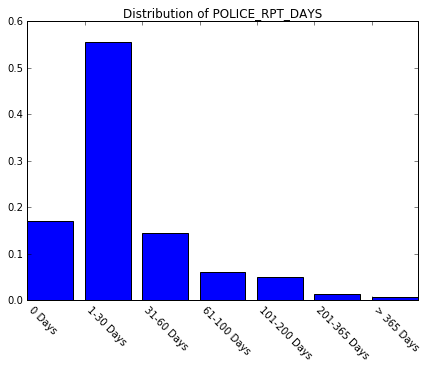

In [30]:
plt.figure(figsize=(7,5))
plt.xticks(range(len(bins_values)),bins, rotation=-45, ha='left')
#plt.set_xticklabels(rotation=45)
plt.title('Distribution of POLICE_RPT_DAYS')
plt.bar(range(len(bins_values)),bins_values)

In [31]:
data_simple[(data_simple['POLICE_RPT_DAYS']>365)].groupby('POLICE_RPT_DAYS')['POLICE_RPT_DAYS'].count().sum()

2199

# SCREENING_DAYS

In [32]:
#Create Bins
bins = ['0 Days','1-30 Days','31-60 Days','61-100 Days','101-200 Days','201-365 Days', '> 365 Days']
bins_values = []
tot_cnt = data_simple['SCREENING_DAYS'].count()

bins_values.append(data_simple[data_simple['SCREENING_DAYS']==0].\
    groupby('SCREENING_DAYS')['SCREENING_DAYS'].count().sum()/tot_cnt)
bins_values.append(data_simple[(data_simple['SCREENING_DAYS']>=1)&(data_simple['SCREENING_DAYS']<=30)].\
    groupby('SCREENING_DAYS')['SCREENING_DAYS'].count().sum()/tot_cnt)
bins_values.append(data_simple[(data_simple['SCREENING_DAYS']>=31)&(data_simple['SCREENING_DAYS']<=60)].\
    groupby('SCREENING_DAYS')['SCREENING_DAYS'].count().sum()/tot_cnt)
bins_values.append(data_simple[(data_simple['SCREENING_DAYS']>=61)&(data_simple['SCREENING_DAYS']<=100)].\
    groupby('SCREENING_DAYS')['SCREENING_DAYS'].count().sum()/tot_cnt)
bins_values.append(data_simple[(data_simple['SCREENING_DAYS']>=101)&(data_simple['SCREENING_DAYS']<=200)].\
    groupby('SCREENING_DAYS')['SCREENING_DAYS'].count().sum()/tot_cnt)
bins_values.append(data_simple[(data_simple['SCREENING_DAYS']>=201)&(data_simple['SCREENING_DAYS']<=365)].\
    groupby('SCREENING_DAYS')['SCREENING_DAYS'].count().sum()/tot_cnt)
bins_values.append(data_simple[(data_simple['SCREENING_DAYS']>=366)].\
    groupby('SCREENING_DAYS')['SCREENING_DAYS'].count().sum()/tot_cnt)

<Container object of 7 artists>

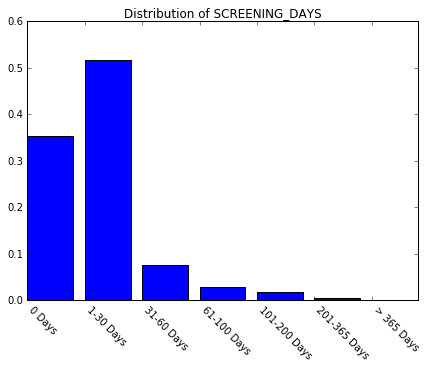

In [33]:
plt.figure(figsize=(7,5))
plt.xticks(range(len(bins_values)),bins, rotation=-45, ha='left')
#plt.set_xticklabels(rotation=45)
plt.title('Distribution of SCREENING_DAYS')
plt.bar(range(len(bins_values)),bins_values)

In [34]:
data_simple[(data_simple['SCREENING_DAYS']>150)].groupby('SCREENING_DAYS')['SCREENING_DAYS'].count().sum()

2635